In [1]:
%matplotlib inline

In [171]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

In [3]:
gaon = pd.read_csv("./total.csv",delimiter="|")
melon = pd.read_csv("./melon.csv",delimiter="|")

In [199]:
row = gaon.join(melon.set_index(["title","artist","year","week"]),on=["title","artist","year","week"])
row = row[np.isnan(row["melon_rank"]) == False].sort_values(by=["year","week","melon_rank"])
row = gaon 
y_label = "digital_rank"
row = row[np.isnan(row[y_label]) == False].sort_values(by=["year","week",y_label])

In [200]:
#row = pd.read_csv("./total.csv",delimiter="|")
#original_row = row.copy()
#row = row.drop(["karaoke_rank","social_rank","social_count"],axis=1).dropna()

In [209]:
drop_column = ["download_count","streaming_count","bgm_rank","karaoke_rank","social_rank","social_count"]
#drop_column = []
row.drop(drop_column,axis=1).dropna().count()

year              16416
week              16416
title             16416
artist            16416
digital_rank      16416
download_rank     16416
streaming_rank    16416
mobile_rank       16416
dtype: int64

In [210]:
data_x = row.copy(deep=True).drop(["year", "week", "title", "artist"] + drop_column, axis=1).dropna()
# data_x = data_x.fillna(value=0)

In [211]:
data_x.head()

,digital_rank,download_rank,streaming_rank,mobile_rank
6286,1.0,1.0,1.0,2.0
6287,2.0,3.0,5.0,8.0
6288,3.0,2.0,48.0,7.0
6289,4.0,4.0,2.0,3.0
6290,5.0,5.0,21.0,62.0


In [212]:
#data_y = data_x.copy()["melon_rank"]
#data_x = data_x.drop(["melon_rank"], axis=1)
data_y = data_x.copy()[y_label]
data_x = data_x.drop([y_label], axis=1)

In [213]:
data_x.count()

download_rank     16416
streaming_rank    16416
mobile_rank       16416
dtype: int64

In [214]:
data_y.count()

16416

In [215]:
#dx = data_x.copy()
#dx["download_rank"] = dx["download_rank"].fillna(value=101)
#dx["download_count"] = dx["download_count"].fillna(value=0)
#dx["streaming_rank"] = dx["streaming_rank"].fillna(value=101)
#dx["streaming_count"] = dx["streaming_count"].fillna(value=0)
#dx["bgm_rank"] = dx["bgm_rank"].fillna(value=101)
#dx["mobile_rank"] = dx["mobile_rank"].fillna(value=101)
#dx["karaoke_rank"] = dx["karaoke_rank"].fillna(value=101)
#dx["social_rank"] = dx["social_rank"].fillna(value=101)
#dx["social_count"] = dx["social_count"].fillna(value=0)

In [216]:
#dy = data_y.fillna(value=101)
#dys = dy.sample(frac=1).sample(n=10000)
half = data_y.count()/2
result = sm.OLS(data_y[:half], data_x[:half], missing="drop").fit()

#result = sm.OLS(dys, dx.iloc[dys.index], missing="drop").fit()
print(result.summary())
print("train error: ", result.mse_total)

y_predict = result.predict(data_x[half:])
rrr = metrics.mean_squared_error(data_y[half:], y_predict)
print("test error: ", rrr)
#print(result.predict())

                            OLS Regression Results                            
Dep. Variable:           digital_rank   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.895e+05
Date:                Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                        23:23:11   Log-Likelihood:                -25372.
No. Observations:                8208   AIC:                         5.075e+04
Df Residuals:                    8205   BIC:                         5.077e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
download_rank      0.6278      0.003    215.

In [75]:
#sns.lmplot(y="digital_rank",x="download_count",data=row[["digital_rank","download_count"]])

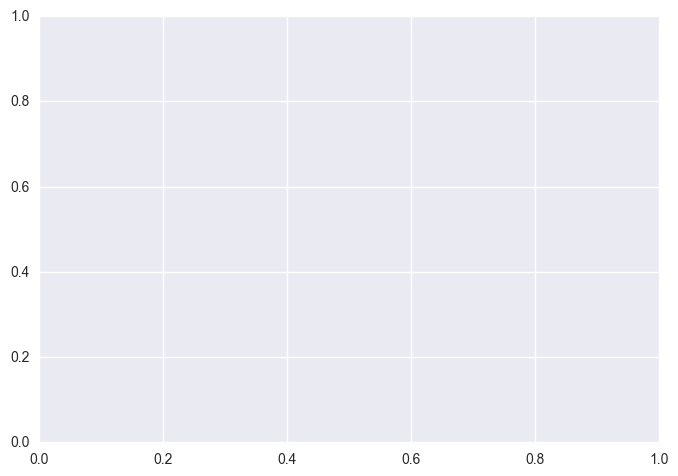

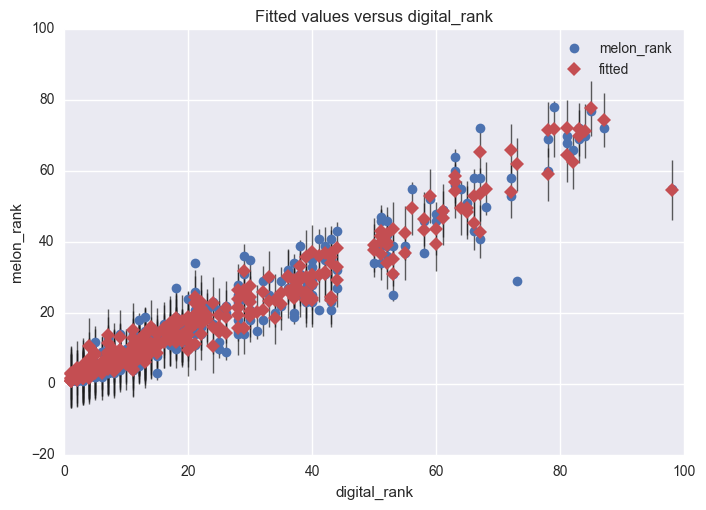

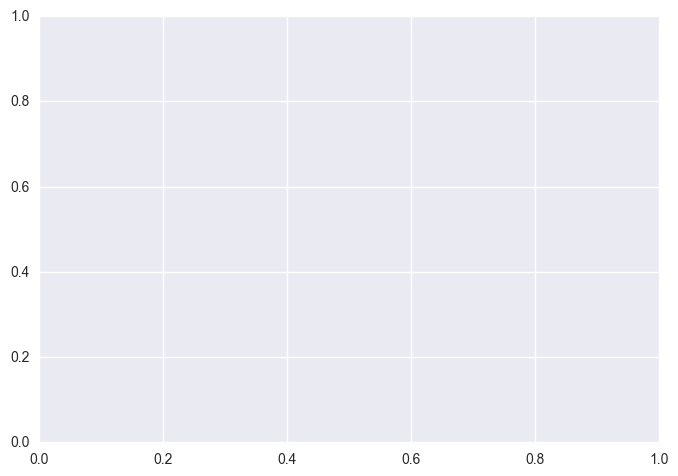

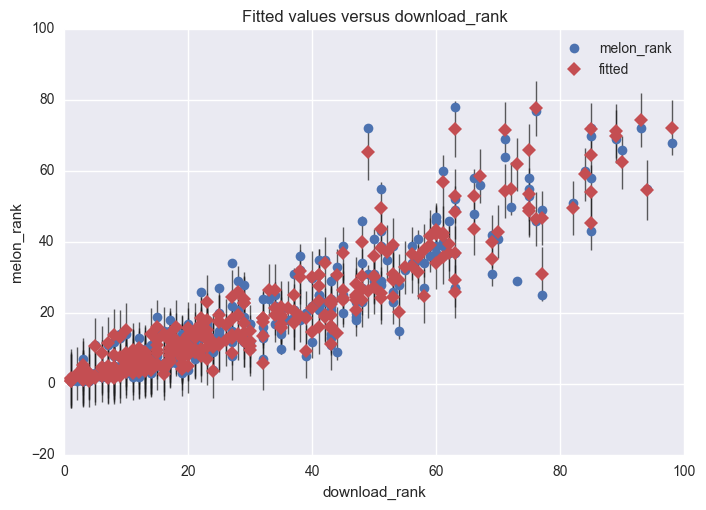

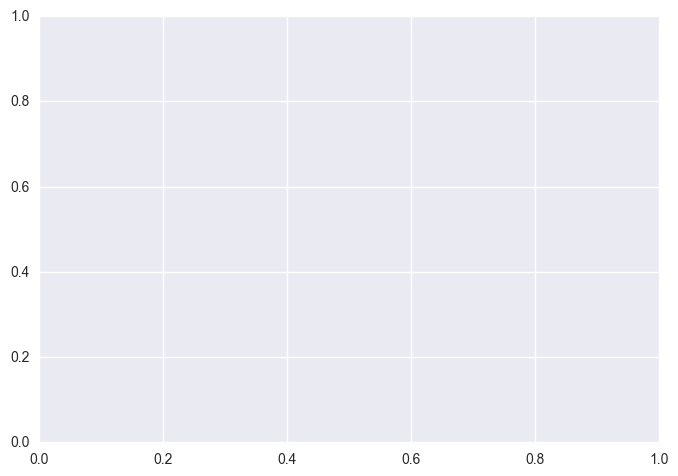

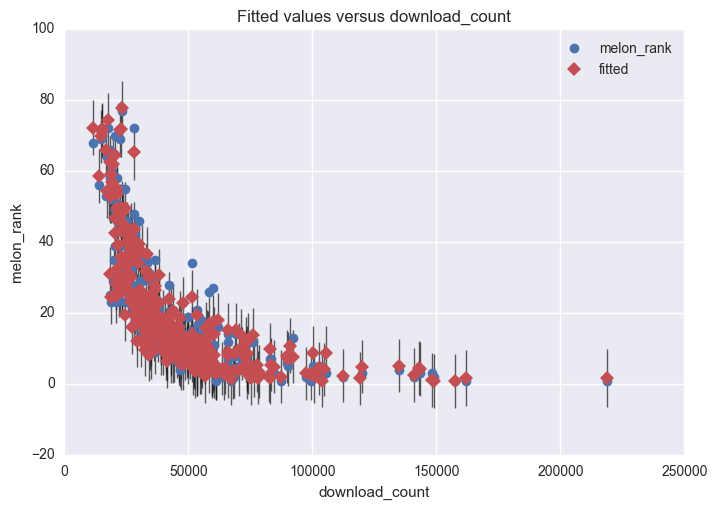

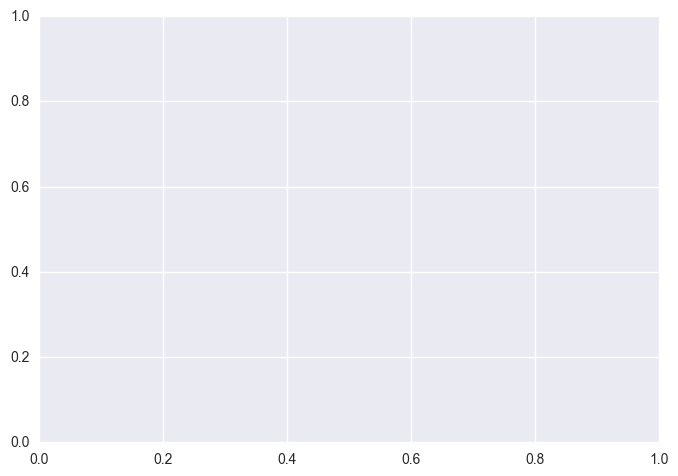

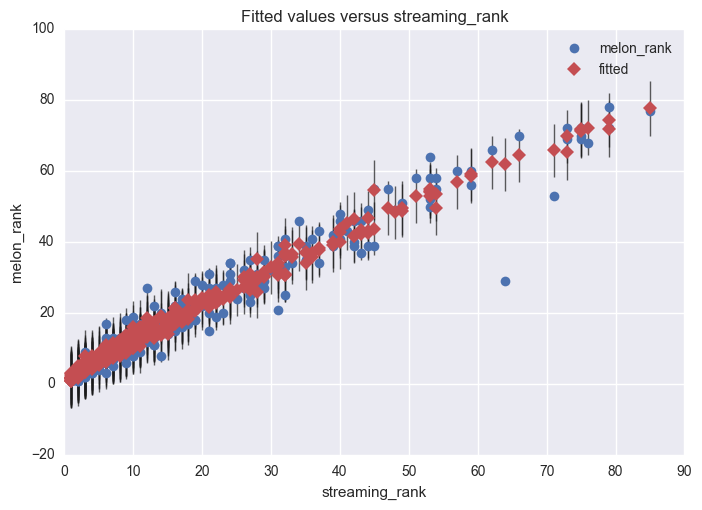

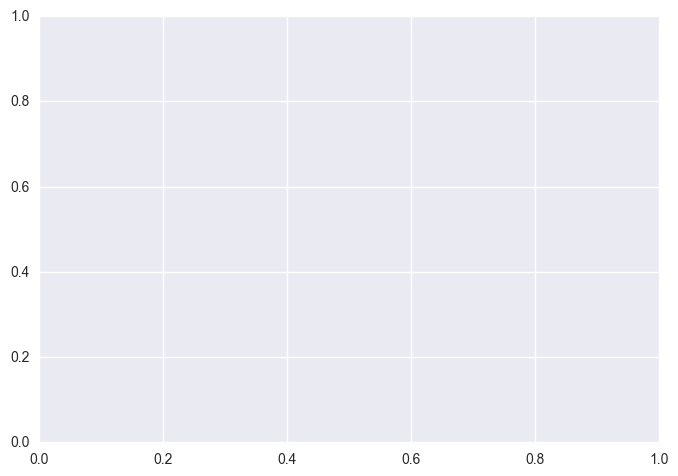

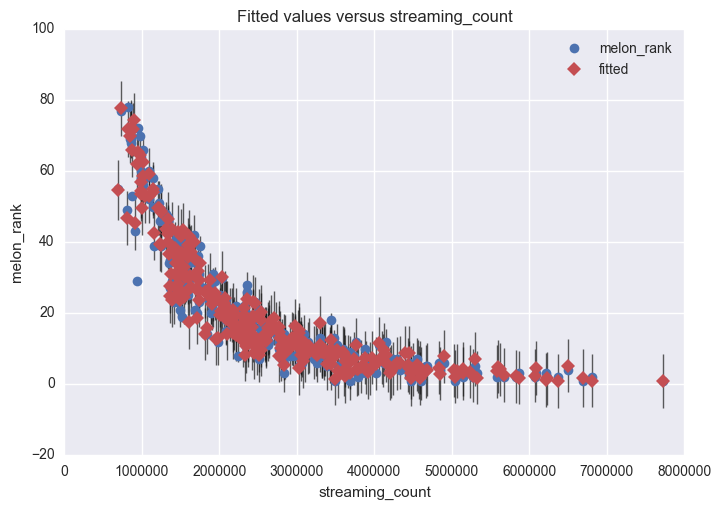

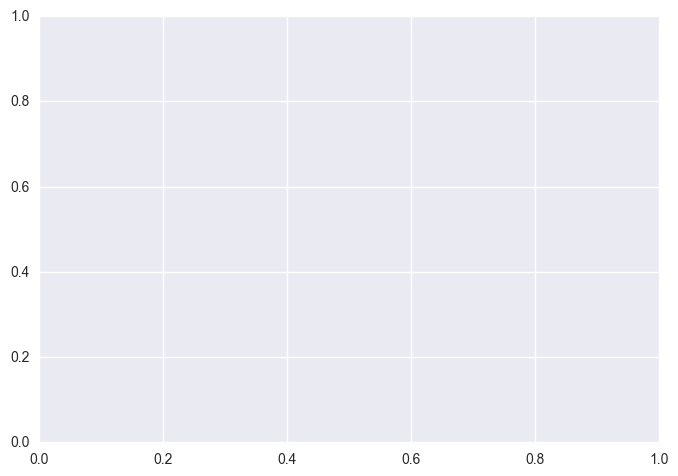

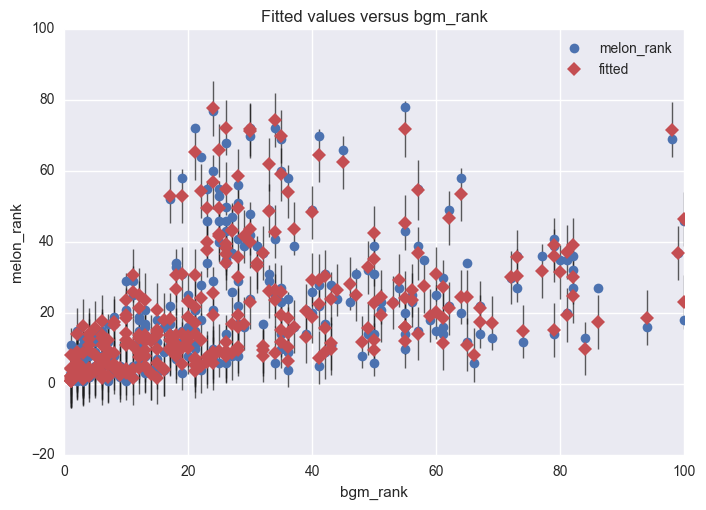

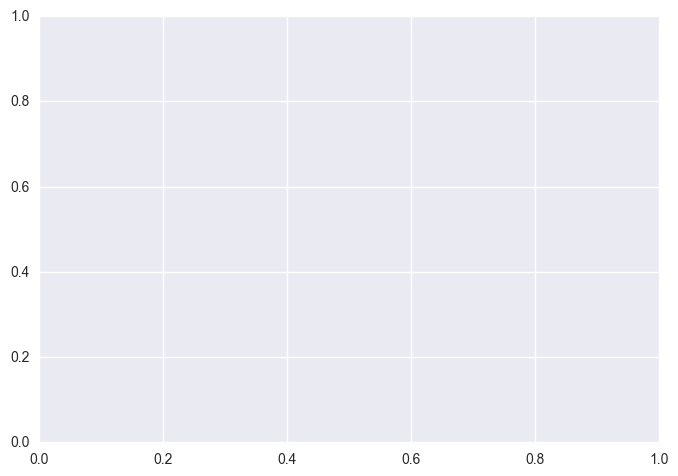

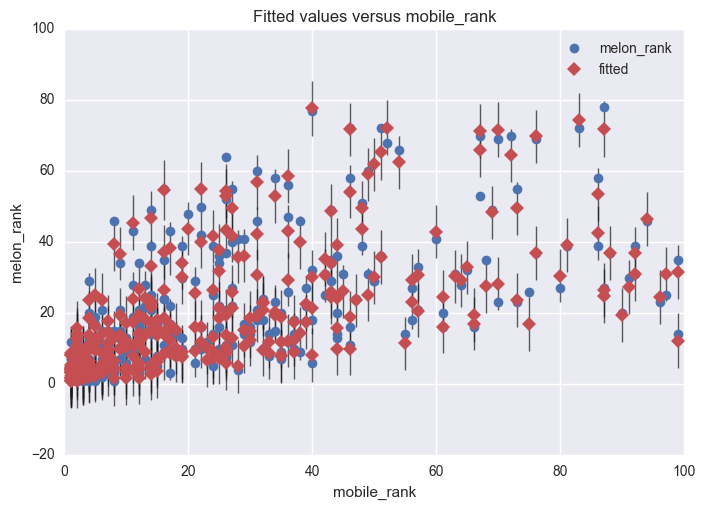

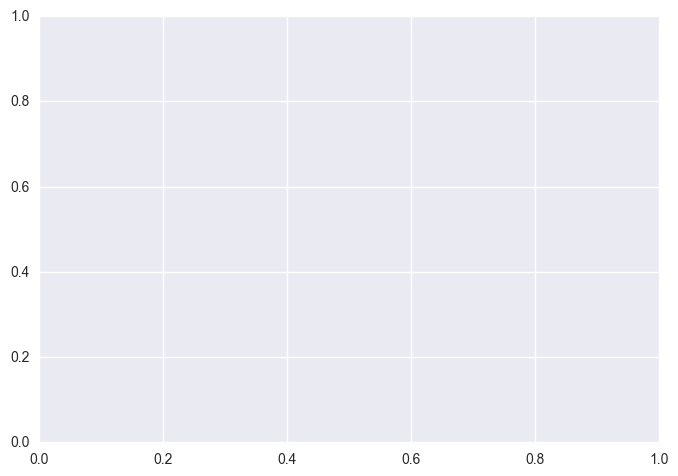

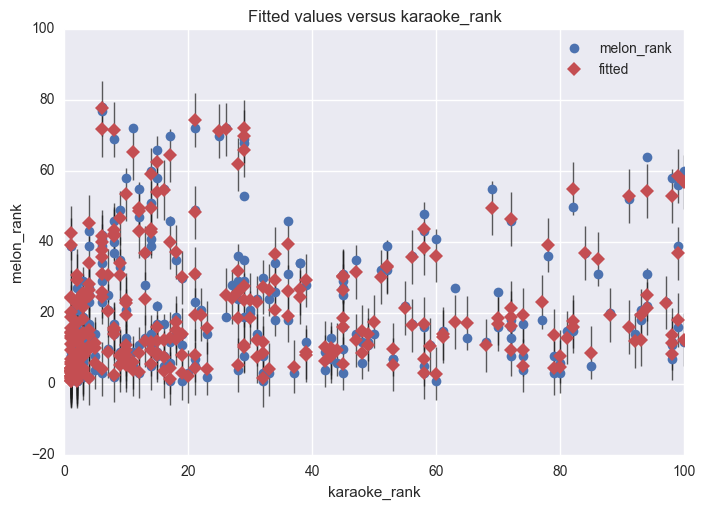

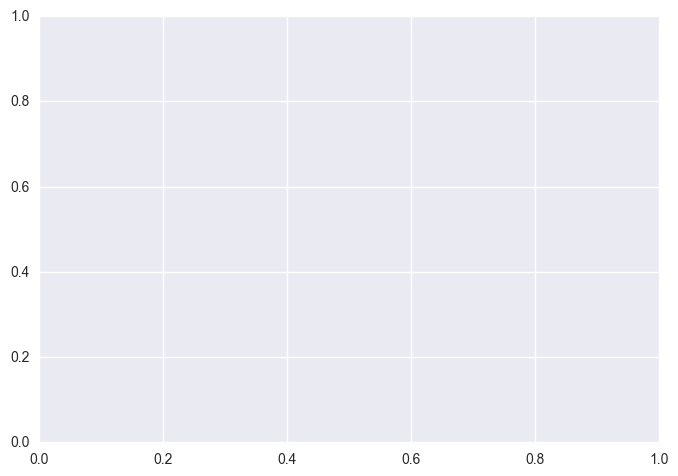

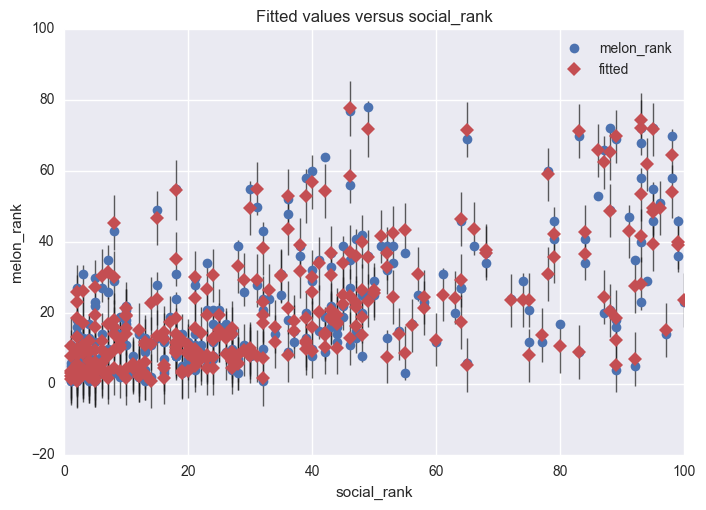

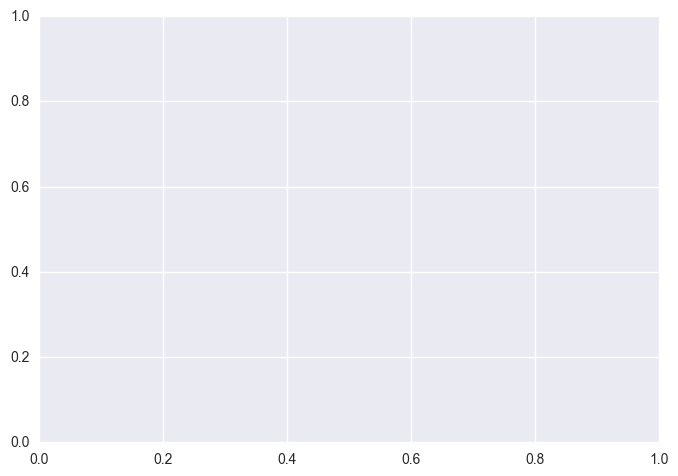

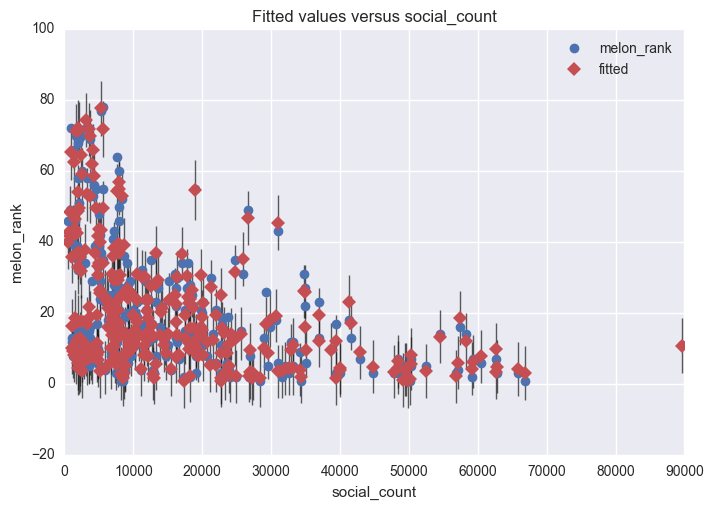

In [103]:
for i in range(0,int(result.df_model)):
    #fig, ax = plt.subplots()
    #print(data_x.columns[i])
    #row.plot.scatter(y="melon_rank", x=data_x.columns[i], ax=ax,
    #                 title="melon_rank" + " vs " + data_x.columns[i])
    fig, ax = plt.subplots()
    sm.graphics.plot_fit(result, i, ax=ax)

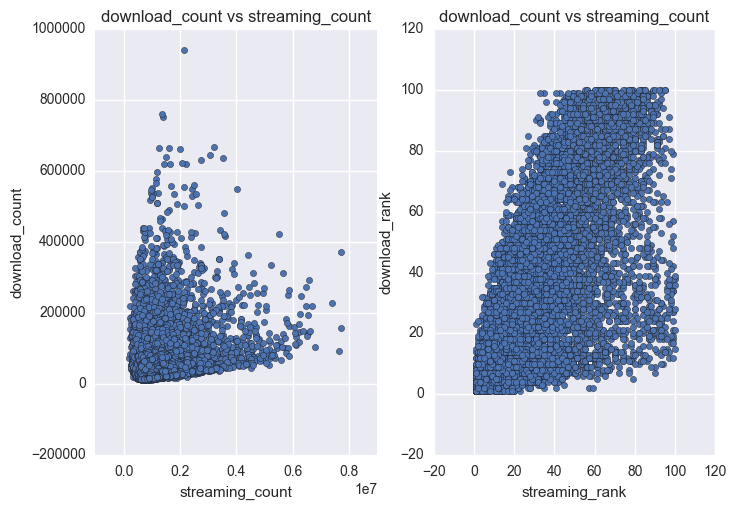

In [88]:
fig, ax = plt.subplots(1,2)
fig2.set_size_inches(18, 6)
row.plot.scatter(y="download_count", x="streaming_count", ax=ax[0], title="download_count" + " vs " + "streaming_count")
row.plot.scatter(y="download_rank", x="streaming_rank", ax=ax[1], title="download_count" + " vs " + "streaming_count")

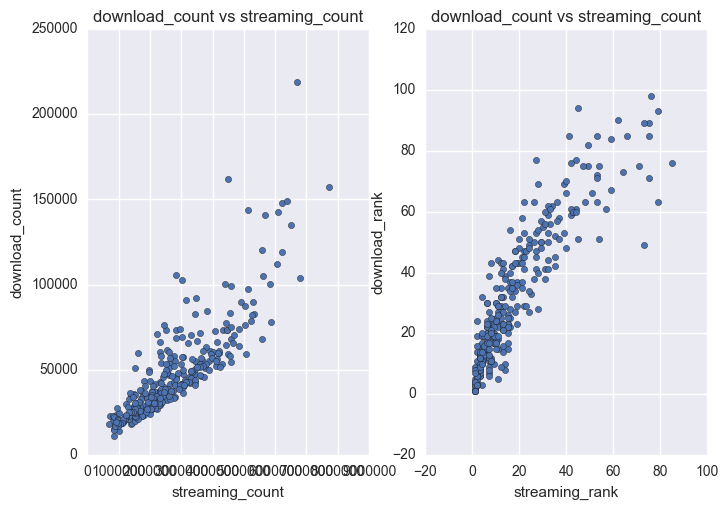

In [89]:
fig, ax = plt.subplots(1,2)
fig2.set_size_inches(18, 6)
row.dropna().plot.scatter(y="download_count", x="streaming_count", ax=ax[0], title="download_count" + " vs " + "streaming_count")
row.dropna().plot.scatter(y="download_rank", x="streaming_rank", ax=ax[1], title="download_count" + " vs " + "streaming_count")

In [90]:
groupby_title_artist = row.groupby(by=["title", "artist"])

In [92]:
for group in groupby_title_artist.groups:
    title_artist_group = groupby_title_artist.get_group(("위잉위잉", "혁오 (hyukoh)"))
    #print(title_artist_group.sort_values(by=["year","week"]))
    break
groupby_title_artist.get_group(("위잉위잉", "혁오 (hyukoh)")).sort_values(by=["year","week"])

,year,week,title,artist,digital_rank,download_rank,download_count,streaming_rank,streaming_count,bgm_rank,mobile_rank,karaoke_rank,social_rank,social_count,melon_rank
79436,2015,28,위잉위잉,혁오 (hyukoh),83.0,53.0,24682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
78986,2015,29,위잉위잉,혁오 (hyukoh),8.0,5.0,151571.0,11.0,3503492.0,22.0,60.0,NaN,NaN,NaN,4.0
78610,2015,30,위잉위잉,혁오 (hyukoh),7.0,5.0,134132.0,7.0,4233210.0,16.0,30.0,77.0,NaN,NaN,2.0
78240,2015,31,위잉위잉,혁오 (hyukoh),2.0,3.0,161677.0,3.0,6030805.0,8.0,15.0,11.0,NaN,NaN,1.0
77877,2015,32,위잉위잉,혁오 (hyukoh),1.0,2.0,142612.0,1.0,6534933.0,7.0,6.0,1.0,NaN,NaN,3.0
77516,2015,33,위잉위잉,혁오 (hyukoh),5.0,6.0,100474.0,1.0,5734069.0,5.0,5.0,1.0,NaN,NaN,2.0
77146,2015,34,위잉위잉,혁오 (hyukoh),5.0,9.0,74829.0,3.0,5195213.0,14.0,7.0,1.0,NaN,NaN,6.0
76779,2015,35,위잉위잉,혁오 (hyukoh),10.0,28.0,62252.0,5.0,4376180.0,24.0,8.0,1.0,NaN,NaN,12.0
76413,2015,36,위잉위잉,혁오 (hyukoh),16.0,18.0,65600.0,12.0,3772818.0,41.0,49.0,1.0,NaN,NaN,10.0
76033,2015,37,위잉위잉,혁오 (hyukoh),13.0,15.0,51273.0,10.0,3687931.0,61.0,83.0,1.0,NaN,NaN,11.0


In [ ]:
row[np.isnan(row["digital_rank"]) & (row["social_rank"]>0)]

In [93]:
row.count()

year               10969
week               10969
title              10969
artist             10969
digital_rank        9761
download_rank       8981
download_count      7840
streaming_rank      9707
streaming_count     8555
bgm_rank            5757
mobile_rank         6386
karaoke_rank        3010
social_rank         1504
social_count        1504
melon_rank         10969
dtype: int64

In [94]:
row[np.isnan(row["streaming_count"])]

,year,week,title,artist,digital_rank,download_rank,download_count,streaming_rank,streaming_count,bgm_rank,mobile_rank,karaoke_rank,social_rank,social_count,melon_rank
8496,2010,1,Heartbeat,2PM,14.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,7.0
8507,2010,1,No Love No More,박진영,25.0,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,14.0
8500,2010,1,사랑하면 안되나요,서인영,18.0,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,20.0
8505,2010,1,잊지 말아요,백지영,23.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,21.0
8491,2010,1,넌 나를 왜 (Feat. 정엽),길미,9.0,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,23.0
8485,2010,1,그대라서,거미,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,24.0
8513,2010,1,기다리다 지친다,2PM,31.0,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,27.0
8559,2010,1,Chu~♡,f(x),77.0,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,30.0
8503,2010,1,꿈을 꾸다 (Main Ver.),김태우,21.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,31.0
8511,2010,1,JoJo,샤이니 (SHINee),29.0,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,34.0
